# Importación de librerías

In [5]:
# API Yahoo
import yfinance as yf

# Data Viz
import matplotlib.pyplot as plt
import ipywidgets as widgets
import mplfinance as mpf
from IPython.display import display
import plotly.graph_objs as go

# Funcionalidades
#timedelta es para diferencias de tiempo, date es una clase
from datetime import date, datetime, timedelta

# Definición de funciones

In [8]:
def get_prices(ticker, start=date.today()-timedelta(days=365), end=date.today()):
    """
    Dado un ticker, carga los datos entre start_date y end_date
    Formato de fecha: YYYY-MM-DD
    Si no se especifica end_date, se inicializa como hoy por defecto.
    Es importante decir que el primer dato puede ser POSTERIOR al dado, pues puede haber empezado a cotizar después de la fecha proporcionada    
    """
    return yf.download(ticker, start=start, end=end).dropna()
    
def pct_change(ticker, start_date=date.today()-timedelta(days=365), end_date=date.today()):
    """
    Dado un ticker, calcula el retorno si hubieramos invertido en la apertura del mercado
    del día start_date hasta el cierre del día actual.
    Formato de fecha: YYYY-MM-DD
    """
    
    # Descargar datos históricos desde start_date hasta end_date
    data = get_prices(ticker, start=start_date, end=end_date)
    
    initial_price = data['Open'].iloc[0]  # Precio de apertura en start_date
    last_price = data['Close'].iloc[-1]  # Precio de cierre actual
    percent_change = ((last_price - initial_price) / initial_price)
    
    return round(percent_change, 4)

def pct_change_from(data):
    """
    Dados unos datos precargados, calcula el retorno si hubieramos invertido en la apertura del mercado
    del primer día en los datos hasta el cierre del último día.
    Formato de fecha: YYYY-MM-DD
    """
    
    initial_price = data['Open'].iloc[0]  # Precio de apertura en start_date
    last_price = data['Close'].iloc[-1]  # Precio de cierre actual
    percent_change = ((last_price - initial_price) / initial_price)
    
    return round(percent_change, 4)

def cagr(ticker, start_date=str(date.today()-timedelta(days=365)), end_date=str(date.today())):
    """
    Obtiene el CAGR (Compound Annual Growth Rate) de una empresa.
    Para ello, toma los años enteros de diferencia desde el start_date hasta end_date, redondeando hacia abajo.
    Si no se especifica año, solo obtiene el pct de cambio de un año
    Formato de fecha: YYYY-MM-DD
    """
    # Descargar datos históricos desde start_date hasta end_date
    data = get_prices(ticker, start=start_date, end=end_date)

    # Normalizo el formato de las fechas, strptime cambia de str a datetime
    start_date = datetime.strptime(start_date, "%Y-%m-%d") 
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    
    anyos = int(((end_date-start_date).days/365)) # Anyos de diferencia, redondeando hacia abajo
    initial_price = data['Open'].iloc[0]  # Precio de apertura en start_date
    last_price = data['Close'].iloc[-1]  # Precio de cierre actual
    
    cagr = ((last_price / initial_price) ** (1 / anyos) - 1)
    return round(cagr, 4)

def cagr_from(data):
    """
    Obtiene el CAGR dado un dataset de cotizaciones
    Para ello, toma los años enteros de diferencia redondeando hacia abajo.
    """
    start_date = data.index[0]
    end_date = data.index[-1]
    anyos = int(((end_date-start_date).days/365)) # Anyos de diferencia, redondeando hacia abajo

    if anyos == 0:
        raise ZeroDivisionError('El dataset contiene menos de un año de datos, necesitas un mínimo de un 1 año')

    initial_price = data['Open'].iloc[0]  # Precio de apertura en start_date
    last_price = data['Close'].iloc[-1]  # Precio de cierre actual
    cagr = ((last_price / initial_price) ** (1 / anyos) - 1)

    return round(cagr, 4)

def plot(ticker, start_date=str(date.today()-timedelta(days=365)), end_date=str(date.today()), volume=False, 
         style='yahoo', title='', ylabel='', ylabel_lower='', savefig=None, type='candle'):
    """
    Dada una fecha de inicio y una fecha de fin, realiza el gráfico de la cotización dentro de ese período.
    Si no hay fecha de fin, toma el último día de cotización.
    Otros atributos:
    - volume: boolean
    - style= consult mpf.available_styles(), 'yahoo' is at default,
    - title= str,
    - ylabel= str,
    - ylabel_lower=str, 
    - savefig=str,
    - type = lines/candles
    Formato de fecha: YYYY-MM-DD
    """

    # Obtener los datos de cotización utilizando yfinance
    data = get_prices(ticker, start=start_date, end=end_date)

    # Normalización
    if title=='': title = f'Cotización de {ticker}'
    if ylabel=='': ylabel='Price'
    if ylabel_lower=='': ylabel_lower='Volume'

    # Graficar usando mplfinance
    if savefig is None:
        mpf.plot(data, type=type, volume=volume, style=style, title=title, ylabel=ylabel, ylabel_lower=ylabel_lower)
    else:
        mpf.plot(data, type=type, volume=volume, style=style, title=title, ylabel=ylabel, ylabel_lower=ylabel_lower, savefig=savefig+'.png')

def plot_from(data, style='yahoo', title='', ylabel='', ylabel_lower='', savefig=None, type='candle', volume=False):
    """
    Dado un dataset de cotizaciones, realiza un gráfico de su cotización.
    Atributos:
    - volume: boolean
    - style= consult mpf.available_styles(), 'yahoo' is at default,
    - title= str,
    - ylabel= str,
    - ylabel_lower=str, 
    - savefig=str,
    - type = lines/candles
    """
    # Normalización
    if title=='': title = f'Cotización del dataset'
    if ylabel=='': ylabel='Price'
    if ylabel_lower=='': ylabel_lower='Volume'

    # Graficar usando mplfinance
    if savefig is None:
        mpf.plot(data, type=type, volume=volume, style=style, title=title, ylabel=ylabel, ylabel_lower=ylabel_lower)
    else:
        mpf.plot(data, type=type, volume=volume, style=style, title=title, ylabel=ylabel, ylabel_lower=ylabel_lower, savefig=savefig+'.png')

In [9]:
tsla = get_prices('TSLA', '2022-03-01', '2023-12-25')

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed

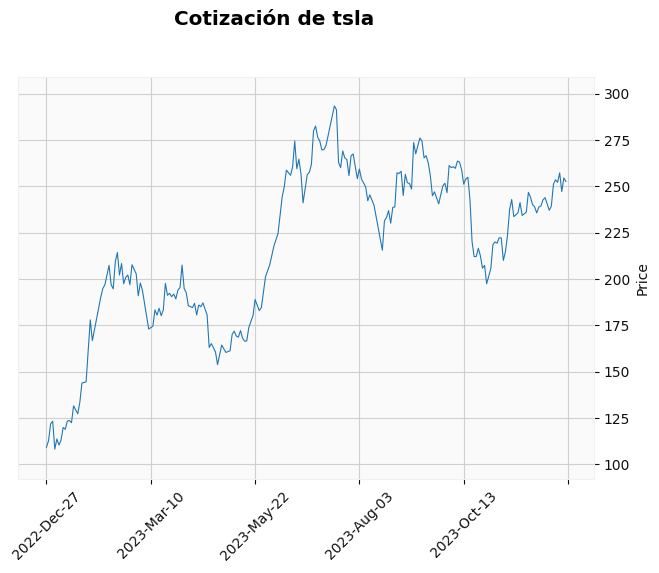

In [13]:
plot('tsla', type='line')

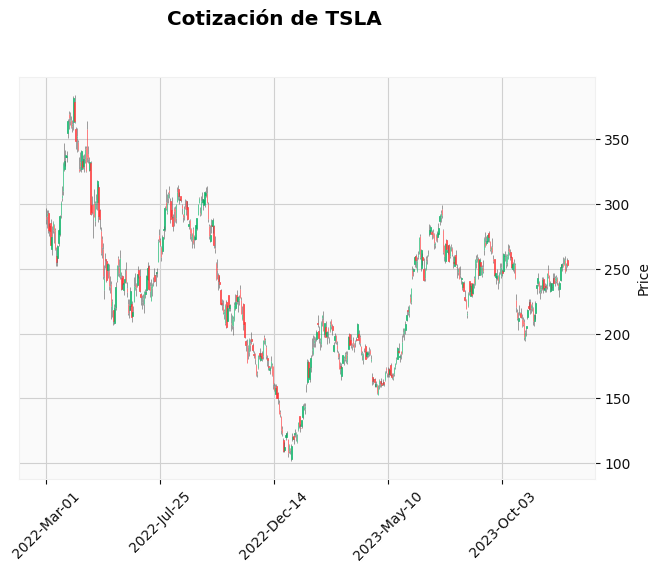

In [10]:
plot_from(tsla, title='Cotización de TSLA')